<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/onlinestore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from  sklearn.preprocessing import LabelEncoder


In [8]:
#get the data
data = pd.read_csv("/content/OnlineRetail (3).csv",parse_dates = ['InvoiceDate'],encoding = 'unicode_escape',na_values=['?','??'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313724 entries, 0 to 313723
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    313724 non-null  object        
 1   StockCode    313724 non-null  object        
 2   Description  312566 non-null  object        
 3   Quantity     313724 non-null  int64         
 4   InvoiceDate  313724 non-null  datetime64[ns]
 5   UnitPrice    313724 non-null  float64       
 6   CustomerID   228398 non-null  float64       
 7   Country      313724 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 19.1+ MB


In [10]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1158
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     85326
Country            0
dtype: int64

In [11]:
data.isna().sum()

InvoiceNo          0
StockCode          0
Description     1158
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     85326
Country            0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228398 entries, 0 to 313723
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    228398 non-null  object        
 1   StockCode    228398 non-null  object        
 2   Description  228398 non-null  object        
 3   Quantity     228398 non-null  int64         
 4   InvoiceDate  228398 non-null  datetime64[ns]
 5   UnitPrice    228398 non-null  float64       
 6   CustomerID   228398 non-null  float64       
 7   Country      228398 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.7+ MB


In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
#drop invoice number,Stockcode,Description
data.drop(['InvoiceNo','StockCode','Description'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228398 entries, 0 to 313723
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     228398 non-null  int64         
 1   InvoiceDate  228398 non-null  datetime64[ns]
 2   UnitPrice    228398 non-null  float64       
 3   CustomerID   228398 non-null  float64       
 4   Country      228398 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 10.5+ MB


In [20]:
data['year'] = data['InvoiceDate'].apply(lambda x: x.year)

In [23]:
data['month'] = data['InvoiceDate'].apply(lambda x:x.month)
data['week'] = data['InvoiceDate'].apply(lambda x:x.week)

In [24]:
data.head()

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  year  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   

   month  week  
0     12    48  
1     12    48  
2     12    48  
3     12    48  
4     12    48

In [25]:
data.nunique()

Quantity         330
InvoiceDate    12728
UnitPrice        427
CustomerID      3336
Country           36
year               2
month              9
week              38
dtype: int64

In [26]:
data['Total_purchase'] = data['Quantity']*data['UnitPrice']

In [27]:
data.head()

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  year  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   

   month  week  Total_purchase  
0     12    48           15.30  
1     12    48           20.34  
2     12    48           22.00  
3     12    48           20.34  
4     12    48           20.34

In [29]:
#check if there are any negative values in quantty/unitprice
data[data['Quantity']<0]

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
141           -1 2010-12-01 09:41:00      27.50     14527.0  United Kingdom   
154           -1 2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
235          -12 2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
236          -24 2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
237          -24 2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
...          ...                 ...        ...         ...             ...   
313424        -6 2011-08-25 14:19:00       1.65     13089.0  United Kingdom   
313425        -4 2011-08-25 14:19:00       2.95     13089.0  United Kingdom   
313426        -3 2011-08-25 14:19:00       2.95     13089.0  United Kingdom   
313479       -10 2011-08-25 14:24:00       1.65     16722.0  United Kingdom   
313480       -24 2011-08-25 14:26:00       0.79     15315.0  United Kingdom   

        year  month  week  Total_purchase  
141     2010     12    48          -27.50  
154     2010     12    48           -4.65  
235     2010     12    48          -19.80  
236     2010     12    48           -6.96  
237     2010     12    48           -6.96  
...      ...    ...   ...             ...  
313424  2011      8    34           -9.90  
313425  2011      8    34          -11.80  
313426  2011      8    34           -8.85  
313479  2011      8    34          -16.50  
313480  2011      8    34          -18.96  

[5424 rows x 9 columns]

In [30]:
data.drop(data[data['Quantity']<0].index,axis=0,inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222974 entries, 0 to 313723
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Quantity        222974 non-null  int64         
 1   InvoiceDate     222974 non-null  datetime64[ns]
 2   UnitPrice       222974 non-null  float64       
 3   CustomerID      222974 non-null  float64       
 4   Country         222974 non-null  object        
 5   year            222974 non-null  int64         
 6   month           222974 non-null  int64         
 7   week            222974 non-null  int64         
 8   Total_purchase  222974 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 17.0+ MB


In [32]:
data[data['UnitPrice']<0]

Empty DataFrame
Columns: [Quantity, InvoiceDate, UnitPrice, CustomerID, Country, year, month, week, Total_purchase]
Index: []

In [33]:
data[data['Total_purchase']<0]

Empty DataFrame
Columns: [Quantity, InvoiceDate, UnitPrice, CustomerID, Country, year, month, week, Total_purchase]
Index: []

In [35]:
#lets check the customer with highest purchase
customer_highest_purchase = data.groupby(['CustomerID'])['Total_purchase'].sum().sort_values(ascending=False)
customer_highest_purchase

CustomerID
14646.0    168927.90
18102.0    130537.23
12415.0     99146.16
17450.0     85770.34
14156.0     85001.90
             ...    
17956.0        12.75
15863.0         9.20
14285.0         5.90
16738.0         3.75
16446.0         2.90
Name: Total_purchase, Length: 3293, dtype: float64

In [37]:
#lets check the sales over years
#for 2010
data_2010 = data[data['year']==2010].sort_values(['InvoiceDate'])
data_2010

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0             6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2             8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...         ...                 ...        ...         ...             ...   
42389         3 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42388         1 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42387         1 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42385         2 2010-12-23 16:06:00       1.69     18116.0  United Kingdom   
42452         2 2010-12-23 16:06:00       1.25     18116.0  United Kingdom   

       year  month  week  Total_purchase  
0      2010     12    48           15.30  
1      2010     12    48           20.34  
2      2010     12    48           22.00  
3      2010     12    48           20.34  
4      2010     12    48           20.34  
...     ...    ...   ...             ...  
42389  2010     12    51            4.95  
42388  2010     12    51            1.65  
42387  2010     12    51            1.65  
42385  2010     12    51            3.38  
42452  2010     12    51            2.50  

[26160 rows x 9 columns]

In [48]:
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293 entries, 2010-12-01 08:26:00 to 2010-12-23 16:06:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        1293 non-null   int64  
 1   UnitPrice       1293 non-null   float64
 2   CustomerID      1293 non-null   float64
 3   year            1293 non-null   int64  
 4   month           1293 non-null   int64  
 5   week            1293 non-null   int64  
 6   Total_purchase  1293 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 80.8 KB


In [43]:
data_2010=data_2010.groupby('InvoiceDate').sum()

<ipython-input-43-37985cfdcf2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2010=data_2010.groupby('InvoiceDate').sum()


In [46]:
import plotly.express as px

In [50]:
data_2010['InvoiceDate'] = data[data['year']==2010]['InvoiceDate'].unique()

In [53]:
data_2010

Quantity  UnitPrice  CustomerID    year  month  week  \
InvoiceDate                                                                 
2010-12-01 08:26:00        40      27.37    124950.0   14070     84   336   
2010-12-01 08:28:00        12       3.70     35700.0    4020     24    96   
2010-12-01 08:34:00        98      77.34    208752.0   32160    192   768   
2010-12-01 08:35:00         3       5.95     13047.0    2010     12    48   
2010-12-01 08:45:00       449      55.29    251660.0   40200    240   960   
...                       ...        ...         ...     ...    ...   ...   
2010-12-23 14:40:00        65      56.78    306220.0   40200    240  1020   
2010-12-23 14:58:00       108      92.00    223665.0   30150    180   765   
2010-12-23 15:16:00       387      45.87    221984.0   28140    168   714   
2010-12-23 15:32:00         1       6.95     12748.0    2010     12    51   
2010-12-23 16:06:00       178     221.31   1612324.0  178890   1068  4539   

                     Total_purchase         InvoiceDate  
InvoiceDate                                              
2010-12-01 08:26:00          139.12 2010-12-01 08:26:00  
2010-12-01 08:28:00           22.20 2010-12-01 08:28:00  
2010-12-01 08:34:00          348.78 2010-12-01 08:34:00  
2010-12-01 08:35:00           17.85 2010-12-01 08:35:00  
2010-12-01 08:45:00          855.86 2010-12-01 08:45:00  
...                             ...                 ...  
2010-12-23 14:40:00          256.61 2010-12-23 14:40:00  
2010-12-23 14:58:00          289.85 2010-12-23 14:58:00  
2010-12-23 15:16:00          968.77 2010-12-23 15:16:00  
2010-12-23 15:32:00            6.95 2010-12-23 15:32:00  
2010-12-23 16:06:00          353.69 2010-12-23 16:06:00  

[1293 rows x 8 columns]

<Axes: xlabel='InvoiceDate', ylabel='Total_purchase'>

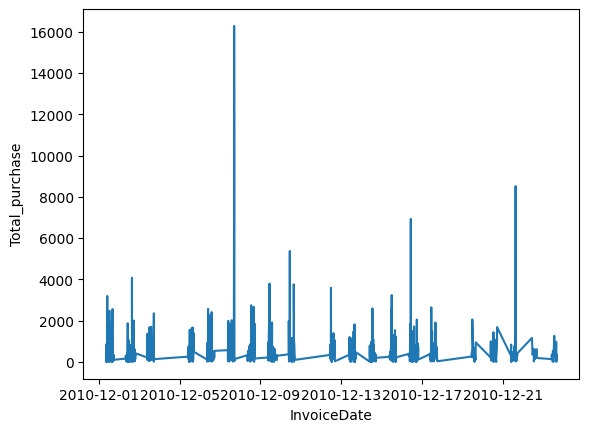

In [55]:
sns.lineplot(x=data_2010['InvoiceDate'],y=data_2010['Total_purchase'])

<Axes: xlabel='year'>

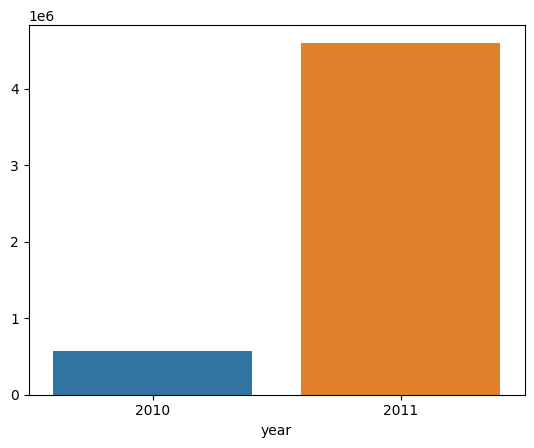

In [58]:
year_data= data.groupby('year')['Total_purchase'].sum()
sns.barplot(x=year_data.index,y=year_data.values)

In [61]:
#lets seee the country whoch has most customers
country_data = data.groupby('Country')['CustomerID'].count()
country_data

Country
Australia                  926
Austria                    267
Bahrain                     17
Belgium                   1234
Brazil                      32
Canada                     151
Channel Islands            503
Cyprus                     350
Czech Republic              15
Denmark                    217
EIRE                      3893
European Community          60
Finland                    431
France                    4517
Germany                   5381
Greece                     109
Iceland                    124
Israel                     214
Italy                      400
Japan                      269
Lebanon                     45
Lithuania                   35
Malta                      100
Netherlands               1486
Norway                     494
Poland                     227
Portugal                   740
Saudi Arabia                 9
Singapore                  188
Spain                     1429
Sweden                     268
Switzerland               1117


<BarContainer object of 36 artists>

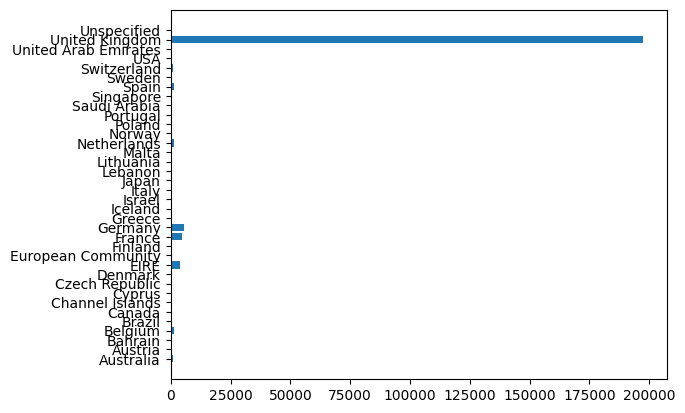

In [68]:
plt.barh(y=country_data.index,width=country_data.values)

We have most of the customers from UK

In [70]:
#Detect outlier
px.box(data['UnitPrice'])

In [71]:
data[data['UnitPrice']>7.5]

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
5              2 2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
16             2 2010-12-01 08:34:00       9.95     13047.0  United Kingdom   
19             4 2010-12-01 08:34:00       7.95     13047.0  United Kingdom   
20             4 2010-12-01 08:34:00       7.95     13047.0  United Kingdom   
45             3 2010-12-01 08:45:00      18.00     12583.0          France   
...          ...                 ...        ...         ...             ...   
313677         1 2011-08-25 15:04:00      12.75     12624.0          France   
313690         2 2011-08-25 15:04:00      18.00     12624.0          France   
313691         2 2011-08-25 15:04:00      11.95     14055.0  United Kingdom   
313697         8 2011-08-25 15:04:00       8.50     14055.0  United Kingdom   
313712         1 2011-08-25 15:09:00      12.75     12748.0  United Kingdom   

        year  month  week  Total_purchase  
5       2010     12    48           15.30  
16      2010     12    48           19.90  
19      2010     12    48           31.80  
20      2010     12    48           31.80  
45      2010     12    48           54.00  
...      ...    ...   ...             ...  
313677  2011      8    34           12.75  
313690  2011      8    34           36.00  
313691  2011      8    34           23.90  
313697  2011      8    34           68.00  
313712  2011      8    34           12.75  

[21522 rows x 9 columns]

Since there are a lots of outliers and we cannot remove them, so we will use Kmedians or DBscan to perform clustering since these models are more robust and wont be affescted by outliers

In [73]:
from sklearn import preprocessing

In [74]:
#lets normalize our data
data_norm = data.copy()
scaler = preprocessing.MinMaxScaler()
data_norm[['UnitPrice','Quantity','Total_purchase']] = scaler.fit_transform(data_norm[['UnitPrice','Quantity','Total_purchase']])

In [75]:
data_norm.describe()

Quantity      UnitPrice     CustomerID           year  \
count  222974.000000  222974.000000  222974.000000  222974.000000   
mean        0.000170       0.000393   15287.284930    2010.882677   
std         0.002205       0.002693    1725.343824       0.321806   
min         0.000000       0.000000   12346.000000    2010.000000   
25%         0.000013       0.000154   13870.000000    2011.000000   
50%         0.000067       0.000239   15159.000000    2011.000000   
75%         0.000148       0.000461   16814.000000    2011.000000   
max         1.000000       1.000000   18287.000000    2011.000000   

               month           week  Total_purchase  
count  222974.000000  222974.000000   222974.000000  
mean        5.505646      21.727457        0.000300  
std         3.156245      13.455586        0.002561  
min         1.000000       1.000000        0.000000  
25%         3.000000      11.000000        0.000065  
50%         5.000000      20.000000        0.000165  
75%         7.000000      30.000000        0.000257  
max        12.000000      51.000000        1.000000

In [84]:
# first i will try to cluster the categorical data customerid and country
data_cat_cluster = data[['CustomerID','Country','Total_purchase']]
data_cat_cluster

CustomerID         Country  Total_purchase
0          17850.0  United Kingdom           15.30
1          17850.0  United Kingdom           20.34
2          17850.0  United Kingdom           22.00
3          17850.0  United Kingdom           20.34
4          17850.0  United Kingdom           20.34
...            ...             ...             ...
313719     12748.0  United Kingdom            4.20
313720     12748.0  United Kingdom            1.90
313721     12748.0  United Kingdom            2.95
313722     18075.0  United Kingdom           39.60
313723     18075.0  United Kingdom           35.40

[222974 rows x 3 columns]

In [81]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [90]:
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(X=data_cat_cluster,categorical=[0, 1])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((data_cat_cluster,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [92]:
labeledCustomers['labels'].value_counts()

2.0    222705
0.0       267
1.0         2
Name: labels, dtype: int64

In [93]:
data_no_num = data_cat_cluster[['CustomerID','Country']]

In [94]:
kmode = KModes(n_clusters=3, n_jobs=3)
clusters = kmode.fit_predict(X=data_no_num)
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((data_no_num,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [97]:
labeledCustomers.labels.value_counts()

0.0    219146
1.0      1928
2.0      1900
Name: labels, dtype: int64

In [ ]:
sns.swarmplot(data=labeledCustomers,x='Country',y='CustomerID',hue='labels')

KeyboardInterrupt: ignored